In [3]:
from pandas import read_csv
import seaborn as sns 
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_regression
dataframe=sns.load_dataset('tips')
dataframe

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dataframe['sex']=lb.fit_transform(dataframe['sex'])
dataframe['smoker']=lb.fit_transform(dataframe['smoker'])
dataframe['day']=lb.fit_transform(dataframe['day'])
dataframe['time']=lb.fit_transform(dataframe['time'])

In [5]:
X=dataframe.drop('tip',axis=1)
Y=dataframe.tip

In [6]:
X

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4
...,...,...,...,...,...,...
239,29.03,1,0,1,0,3
240,27.18,0,1,1,0,2
241,22.67,1,1,1,0,2
242,17.82,1,0,1,0,2


In [7]:
Y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [8]:
test = SelectKBest(score_func=f_regression, k=3).fit(X,Y)
test

SelectKBest(k=3, score_func=<function f_regression at 0x0000016AC1AAC540>)

In [9]:
np.round(test.scores_,2)

array([2.0336e+02, 1.9300e+00, 1.0000e-02, 3.0000e-02, 3.6300e+00,
       7.6180e+01])

In [10]:

np.round(test.pvalues_,3)

array([0.   , 0.166, 0.927, 0.858, 0.058, 0.   ])

In [11]:
dataframe.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [12]:
dataframe.columns[test.get_support(indices=True)]

Index(['total_bill', 'day', 'time'], dtype='object')

In [13]:
df=sns.load_dataset('iris') 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
x=df.iloc[:,0:4]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
y=df['species']

In [16]:
sel=SelectKBest(score_func=chi2,k=2).fit(x,y)
sel

SelectKBest(k=2, score_func=<function chi2 at 0x0000016AC1AAC2C0>)

In [27]:
sel.pvalues_

array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15])

In [32]:
sel.scores_

array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ])

In [33]:
df.columns[np.where(sel.get_support(indices=True))]

Index(['sepal_length', 'sepal_width'], dtype='object')

In [37]:
sns.distplot(

SyntaxError: incomplete input (177800009.py, line 1)

In [39]:
df.rename({'sex':'gender'},axis=1,inplace=True)
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()


In [41]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
import pandas as pd
data=pd.read_csv(r"C:\Users\yetta\OneDrive\Desktop\NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='daily', ylabel='Density'>

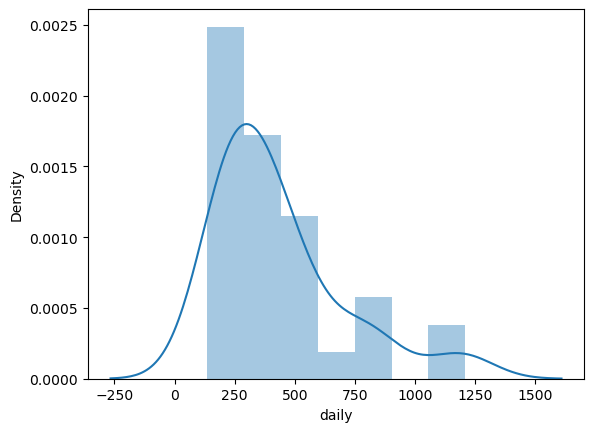

In [47]:
sns.distplot(data['daily'])

<Axes: xlabel='sunday', ylabel='Density'>

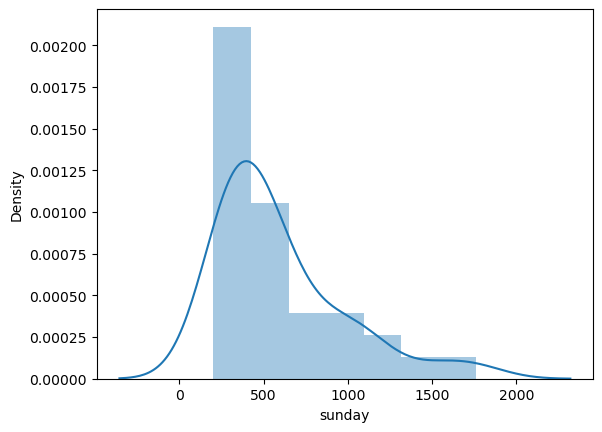

In [49]:
sns.distplot(data['sunday'])

In [51]:
import statsmodels.formula.api as smf
model = smf.ols('sunday~daily',data = data).fit()

<Axes: xlabel='daily', ylabel='sunday'>

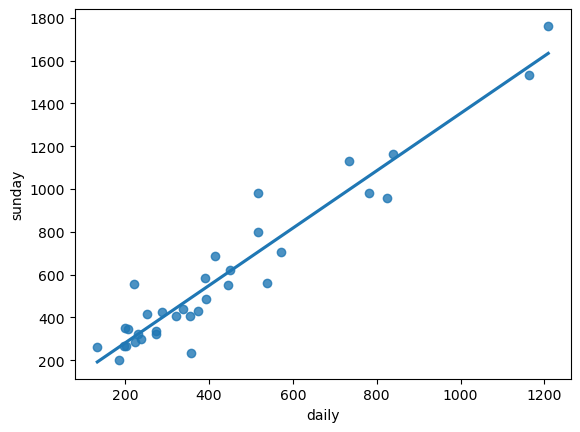

In [53]:
sns.regplot(x='daily',y='sunday',data=data, ci=None)

In [55]:
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [57]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [59]:
print(model.tvalues, '\n',model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [61]:
(model.rsquared,model.rsquared_adj)


(0.9180596895873294, 0.9154990548869335)

In [63]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [71]:
print(model.tvalues, '\n',model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [73]:
(model.rsquared, model.rsquared_adj)

(0.9180596895873294, 0.9154990548869335)

In [75]:
daily=100

In [77]:
sunday=1.33915*daily+ 13.835630

In [79]:
sunday

281.66563

In [81]:
from sklearn.linear_model import LinearRegression

In [83]:
data.head(3)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084


In [ ]:
lr=LinearRegression